# Отчет по предмету "Разработка приложений в распределенной среде"
# студента группы 02121-ДМ Подрядчиков Владимира Валерьевича

## Лабораторная работа №1. Разработка распределённого приложения с использованием технологии удалённого вызова методов (RPC)

Цель:
Познакомиться с концепцией удалённого вызова процедур (Remote Procedure Call, RPC) на примере использования встроенного модуля xmlrpc в Python.

In [3]:
#сервер

from xmlrpc.server import SimpleXMLRPCServer
from xmlrpc.server import SimpleXMLRPCRequestHandler
import threading

class RequestHandler(SimpleXMLRPCRequestHandler):
    rpc_paths = ('/RPC2',)

server = SimpleXMLRPCServer(("localhost", 9000), requestHandler=RequestHandler, allow_none=True)
server.register_introspection_functions()

def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

server.register_function(add, 'add')
server.register_function(subtract, 'subtract')

def run_server():
    print("Подключение к серверу")
    server.serve_forever()

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

Подключение к серверу


In [4]:
#клиент

import xmlrpc.client
import time


time.sleep(1)

proxy = xmlrpc.client.ServerProxy("http://localhost:9000/RPC2", allow_none=True)

# Тестирование удалённых вызовов
print("Запрос клиента. Результат add(5, 3):", proxy.add(5, 3))
print("Запрос клиента. Результат subtract(10, 4):", proxy.subtract(10, 4))

[КЛИЕНТ] Результат add(5, 3): 8
[КЛИЕНТ] Результат subtract(10, 4): 6


127.0.0.1 - - [08/Jun/2025 11:57:03] "POST /RPC2 HTTP/1.1" 200 -
127.0.0.1 - - [08/Jun/2025 11:57:03] "POST /RPC2 HTTP/1.1" 200 -


## Лабораторная работа №2. Разработка консольного клиент-серверного приложения на Python с использованием сокетов

Цель:
Изучить основы работы с TCP-соединением между клиентом и сервером на Python
с использованием модуля socket. Обеспечить обмен простыми сообщениями.



In [15]:
#сервер

import socket
import threading

HOST = '127.0.0.1'
PORT = 65432

def handle_client(conn, addr):
    print(f"Подключено: {addr}")
    conn.sendall("Привет от сервера".encode())
    while True:
        data = conn.recv(1024)
        if not data:
            break
        print(f"Получено от клиента: {data.decode()}")
        response = f"Сервер получил: {data.decode()}"
        conn.sendall(response.encode())
    conn.close()
    print(f"Соединение с {addr} закрыто")

def run_server():
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((HOST, PORT))
        s.listen()
        print(f"Подключение к серверу на {HOST}:{PORT}")
        conn, addr = s.accept()
        handle_client(conn, addr)

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()


Подключение к серверу на 127.0.0.1:65432


In [16]:
#клиент

import socket
import time

time.sleep(2)

HOST = '127.0.0.1'
PORT = 65432

with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
    s.connect((HOST, PORT))
    greeting = s.recv(1024).decode()
    print(f"Клиент - Сообщение от сервера: {greeting}")

    for msg in ["Привет", "Как дела?", "Пока"]:
        s.sendall(msg.encode())
        data = s.recv(1024)
        print(f"Клиент - Ответ: {data.decode()}")

    print("Клиент - Закрытие соединения")


Подключено: ('127.0.0.1', 33844)
Клиент - Сообщение от сервера: Привет от сервера
Получено от клиента: Привет
Клиент - Ответ: Сервер получил: Привет
Получено от клиента: Как дела?
Клиент - Ответ: Сервер получил: Как дела?
Получено от клиента: Пока
Клиент - Ответ: Сервер получил: Пока
Клиент - Закрытие соединения
Соединение с ('127.0.0.1', 33844) закрыто


## Лабораторная работа №3. Разработка клиент-серверного приложения с графическим пользовательским интерфейсом

Цель:
Создать клиент-серверное приложение, в котором клиент имеет графический интерфейс (GUI).  
GUI реализован с помощью библиотеки Tkinter,
сервер работает в отдельном потоке и использует сокеты (TCP).

In [ ]:
#сервер

import socket
import threading
import tkinter as tk
from tkinter import messagebox
import time

HOST = '127.0.0.1'
PORT = 65433

def run_server():
    def handle_client(conn, addr):
        print(f"Подключение от {addr}")
        while True:
            data = conn.recv(1024)
            if not data:
                break
            msg = data.decode()
            print(f"Получено: {msg}")
            reply = f"Сервер получил: {msg}"
            conn.sendall(reply.encode())
        conn.close()
        print(f"Соединение закрыто с {addr}")

    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((HOST, PORT))
        s.listen()
        print(f"Ожидание подключений на {HOST}:{PORT}")
        conn, addr = s.accept()
        handle_client(conn, addr)

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()


In [ ]:
#клиент
#в Colab интерфейс недоступен. Далее будут скриншоты из VS Code

import tkinter as tk
from tkinter import messagebox
import socket

class ClientGUI:
    def __init__(self, master):
        self.master = master
        master.title("Клиент")

        self.label = tk.Label(master, text="Введите сообщение:")
        self.entry = tk.Entry(master, width=40)
        self.send_button = tk.Button(master, text="Отправить", command=self.send_message)
        self.response_label = tk.Label(master, text="Ответ:", fg="blue")

        self.label.pack()
        self.entry.pack()
        self.send_button.pack()
        self.response_label.pack()

    def send_message(self):
        msg = self.entry.get()
        if not msg:
            messagebox.showwarning("Пустое сообщение", "Введите сообщение")
            return

        try:
            with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
                s.connect((HOST, PORT))
                s.sendall(msg.encode())
                data = s.recv(1024).decode()
                self.response_label.config(text=f"Ответ: {data}")
        except ConnectionRefusedError:
            messagebox.showerror("Ошибка", "Не удалось подключиться к серверу")
        except Exception as e:
            messagebox.showerror("Ошибка", f"Произошла ошибка: {str(e)}")

root = tk.Tk()
client_app = ClientGUI(root)
root.mainloop()

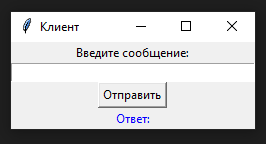

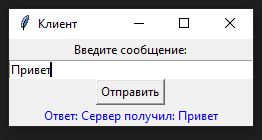

Вывод в терминале:

Ожидание подключений на 127.0.0.1:65433  
Подключение от ('127.0.0.1', 57898)  
Получено: Привет  
Соединение закрыто с ('127.0.0.1', 57898)  

## Лабораторная работа №4. Клиент-серверное GUI-приложение с доступом к базе данных SQLite

Цель:
Создать распределённое приложение, где сервер взаимодействует с базой данных (SQLite),
а клиент имеет графический интерфейс (GUI) и отправляет запросы серверу для выполнения операций с данными.

Для простоты был использован steamlit


In [27]:
#сервер

import socket
import threading
import sqlite3
import time

HOST = '127.0.0.1'
PORT = 65434
DB_NAME = 'telephone_book'

def init_db():
    conn = sqlite3.connect(DB_NAME)
    c = conn.cursor()
    c.execute('''CREATE TABLE IF NOT EXISTS users (
                 id INTEGER PRIMARY KEY AUTOINCREMENT,
                 name TEXT NOT NULL)''')
    conn.commit()
    conn.close()

def handle_db_request(msg):
    conn = sqlite3.connect(DB_NAME)
    c = conn.cursor()
    if msg.startswith("ADD "):
        name = msg[4:].strip()
        c.execute("INSERT INTO users (name) VALUES (?)", (name,))
        conn.commit()
        return f"Пользователь '{name}' добавлен"
    elif msg == "LIST":
        c.execute("SELECT id, name FROM users")
        rows = c.fetchall()
        return "Список пользователей:\n" + "\n".join([f"{r[0]}: {r[1]}" for r in rows])
    else:
        return "Неверная команда"

def run_server():
    init_db()
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.bind((HOST, PORT))
        s.listen()
        print(f"Ожидание подключений на {HOST}:{PORT}")
        while True:
            conn, addr = s.accept()
            with conn:
                data = conn.recv(1024).decode()
                if not data:
                    continue
                print(f"Запрос: {data}")
                result = handle_db_request(data)
                conn.sendall(result.encode())

server_thread = threading.Thread(target=run_server, daemon=True)
server_thread.start()

In [28]:

print("КЛИЕНТ: CLI-интерфейс для взаимодействия с сервером и базой данных")
print("Доступные команды: ADD <имя> / LIST / EXIT")

while True:
    msg = input("Введите команду: ").strip()
    if msg.upper() == "EXIT":
        print("Выход из клиента.")
        break
    try:
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            s.connect((HOST, PORT))
            s.sendall(msg.encode())
            data = s.recv(4096).decode()
            print("Ответ от сервера:\n" + data)
    except Exception as e:
        print(f"Ошибка подключения: {e}")


КЛИЕНТ: CLI-интерфейс для взаимодействия с сервером и базой данных
Доступные команды: ADD <имя> / LIST / EXIT
Введите команду: ADD Vova
Запрос: ADD Vova
Ответ от сервера:
Пользователь 'Vova' добавлен.
Введите команду: LIST
Запрос: LIST
Ответ от сервера:
Список пользователей:
1: Vova
Введите команду: ADD Nina
Запрос: ADD Nina
Ответ от сервера:
Пользователь 'Nina' добавлен.
Введите команду: LIST
Запрос: LIST
Ответ от сервера:
Список пользователей:
1: Vova
2: Nina
Введите команду: EXIT
Выход из клиента.


Приложение позволяет вносить имена пользователей в базу данных telephone_book через GUI. Также можно вывести список всех пользователей командой LIST и выйти из приложения командой EXIT.